# Machine Learning for Computer Vision
## Assignment 1 - Group 06



### 1.1.1

In [10]:
from packages import *

import data_manager
# import perceptron

### Read Data

In [43]:
### Read data
x_train, y_train, x_test, y_test = data_manager.read_mnist_data()

### In case the images should be saved to jpg files
# save_images_to_jpgs('./images/train2', x_train, y_train)
# save_images_to_jpgs('./images/test2', x_test, y_test)

### Reshape images and make them binary

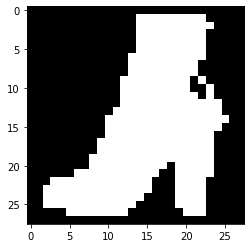

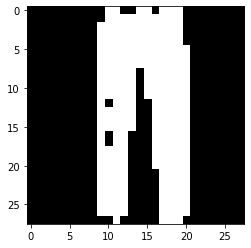

In [50]:
### Extracting subset of classes Ankle boot(9) and Trousers(1)
indices = np.where((y_train == 1) | (y_train == 9))
mnist_subset_rows = x_train[indices]
image_subset = mnist_subset_rows.reshape(mnist_subset_rows.shape[0],28,28)
label_subset = y_train[indices]

### Convert images to binary
thres = 127
image_subset[image_subset < thres] = 0
image_subset[image_subset >= thres] = 1

plt.imshow(image_subset[1],  cmap='gray')
plt.show()
plt.imshow(image_subset[3],  cmap='gray')
plt.show()

### Extract features from the data

In [51]:
### Subeset containing the first 20 images
features_subset = data_manager.extract_features(image_subset[:200], label_subset[:200])
# features_subset = data_manager.extract_features(image_subset[20:50], label_subset[20:50])

### Normalize features
features_subset.area = features_subset.area / max(features_subset.area)
features_subset.cx = features_subset.cx / max(features_subset.cx)
features_subset.cy = features_subset.cy / max(features_subset.cy)
features_subset.convex_area = features_subset.convex_area / max(features_subset.convex_area)
features_subset.eccentricity = features_subset.convex_area / max(features_subset.convex_area)
features_subset.perimeter = features_subset.convex_area / max(features_subset.convex_area)

features_subset

,class,cx,cy,area,convex_area,eccentricity,perimeter,extent
image,,,,,,,,
0,Ankle boot,0.833543,0.916447,0.784580,0.763636,0.763636,0.763636,0.633700
1,Ankle boot,0.810116,0.841207,0.755102,0.820000,0.820000,0.820000,0.533654
2,Ankle boot,0.837455,0.868666,0.687075,0.698182,0.698182,0.698182,0.569549
3,Trouser,0.762273,0.696770,0.598639,0.600000,0.600000,0.600000,0.785714
4,Trouser,0.717665,0.726915,0.505669,0.465455,0.465455,0.465455,0.844697
...,...,...,...,...,...,...,...,...
195,Ankle boot,0.884501,0.887092,0.585034,0.583636,0.583636,0.583636,0.583710
196,Trouser,0.704250,0.692146,0.546485,0.530909,0.530909,0.530909,0.743827
197,Trouser,0.737176,0.630646,0.446712,0.523636,0.523636,0.523636,0.639610


### Plotting features

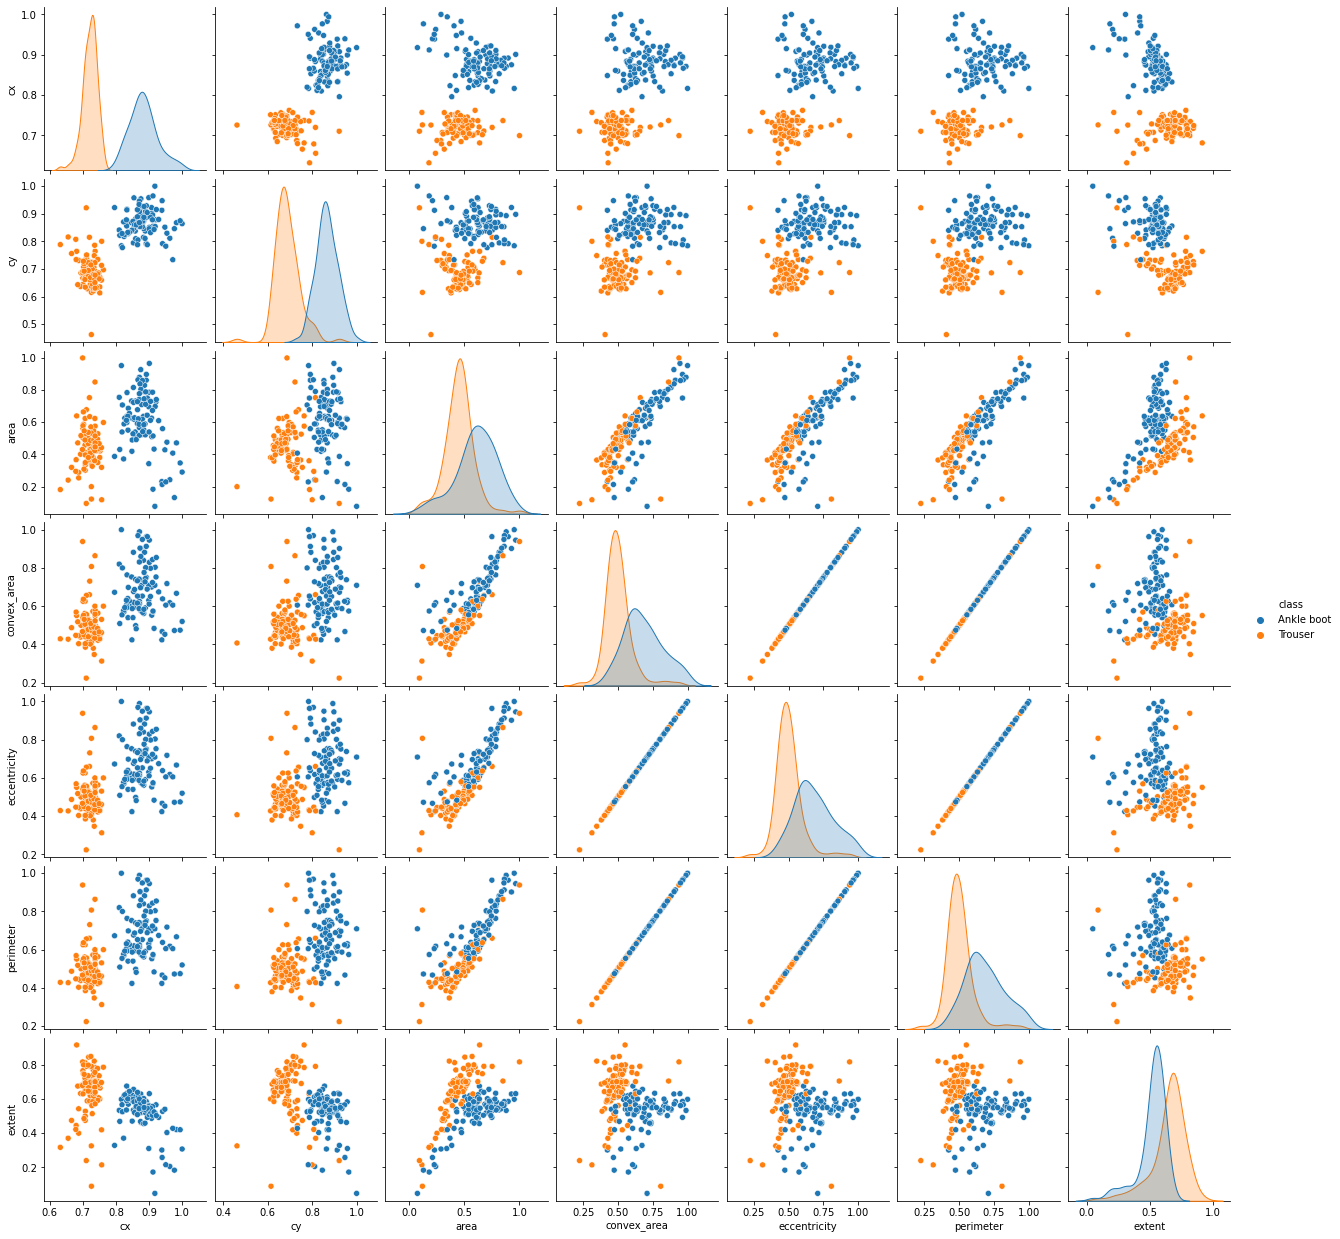

In [52]:
### Comparing different feature combinations
sns.pairplot(features_subset, hue="class");

<AxesSubplot:xlabel='perimeter', ylabel='cx'>

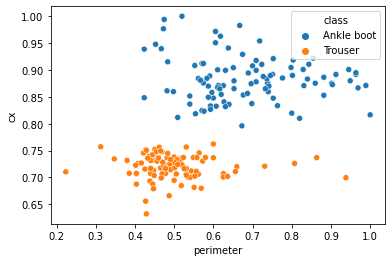

In [54]:
### Best combination with this subset seems to be 'perimeter' and the centroid 'cx'
sns.scatterplot(data=features_subset, x='perimeter', y='cx', hue='class')